In [1]:
import numpy as np 
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt

# Import TCGA melanoma data 
## Rna read data
file='../data/counts.txt'
with open(file, 'rt') as f: 
    read_counts=pd.read_csv(f,index_col=0) 

In [2]:
counts=read_counts.values

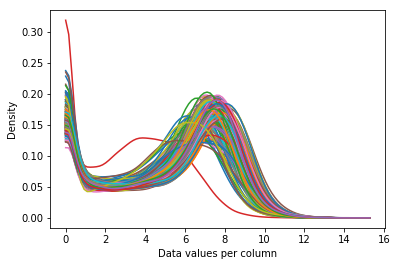

In [3]:
def plot_col_density(data):
    
    density_per_col=[stats.gaussian_kde(col) for col in data.T]
    x=np.linspace(np.min(data),np.max(data),100)
    
    fix,ax=plt.subplots()
    
    for density in density_per_col:
        ax.plot(x, density(x))
    ax.set_xlabel('Data values per column')
    ax.set_ylabel('Density')

log_counts=np.log(counts +1)
plot_col_density(log_counts)
        

In [4]:
def quantile_norm(X):
    """
    
    Normalize each X column (sample) to have SAME distribution
    
    Parameters 
    ..........
    
    X: 2D array of flaot shape (m,n)
    
    Returns 
    ..........
    
    Xn: 2D array of float shape (m,n)
        data normalized
    
    """

    ## compute quantiles
    
    quantiles=np.mean(np.sort(X,axis=0),axis=1) ## sort the values by row, thn calculate the mean by column 
    
    ranks=np.apply_along_axis(stats.rankdata,0,X)
    
    ## 
    rank_indices=ranks.astype(int)-1
    
    Xn=quantiles[rank_indices]
    
    return Xn

def quantile_norm_log(x):
    logx=np.log(x+1)
    logxn=quantile_norm(logx)
    return logxn

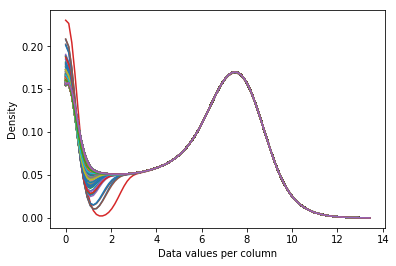

In [5]:
log_counts_normalized=quantile_norm_log(counts)
plot_col_density(log_counts_normalized)